## Imports

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import geometry
from gasmarketmodel.params import europe_frame

%load_ext autoreload
%autoreload 2

## Parameters

In [3]:
# label/sheet name : total_row_switch, row offset, index columns
output_dict = {
    "Mapping" : [False, -4, 0],
    "Demand" : [True, 0, 0],
    "Production" : [True, 0, 0],
    "Price" : [False, 0, 0],
    "LNG" : [True, 8, [0, 1, 2]],
    "Piped Imports" : [True, 12, [0, 1, 2]],
    #"Piped Exports" : [True, 12, [0, 1, 2]],
    "Connections" : [False, 12, [0, 1, 2]],
    "Supply Mix" : [False, 11, [0, 1]]
}

output_df_dict = {}

# Border color
edgecolor = "black"
# Color scheme
cmap = "cool"
# Line width
linewidth = 1

country_names = {
    "Deutschland" : "Germany",
    "Niederlande" : "Netherlands",
    "Frankreich" : "France",
    "Schweiz" : "Switzerland",
    "Luxemburg" : "Luxembourg",
    "Belgien" : "Belgium",
    "Spanien" : "Spain",
    "Portugal" : "Portugal",
    "Italien" : "Italy",
    "Österreich" : "Austria",
    "Schweden" : "Sweden",
    "Finnland" : "Finland",
    "Dänemark" : "Denmark",
    "Polen" : "Poland",
    "Tschechien" : "Czechia",
    "Slowakei" : "Slovakia",
    "Litauen" : "Lithuania",
    "Lettland" : "Latvia",
    "Estland" : "Estonia",
    "Ungarn" : "Hungary",
    "Slowenien" : "Slovenia",
    "Kroatien" : "Croatia",
    "Rumänien" : "Romania",
    "Bulgarien" : "Bulgaria",
    "Griechenland" : "Greece",
    "Irland" : "Ireland",
    "UK" : "United Kingdom",
    "Malta" : "Malta",
    "Zypern" : "Cyprus",
    "Ukraine" : "Ukraine"
}

importers_list = [
    "Algerien",
    "Libyen",
    "Norwegen",
    "Russland"
]

## Data from Excel

In [4]:
output_df_dict

{}

In [5]:
for output_metric, output_params in output_dict.items():
    output_df_dict[output_metric] = pd.read_excel(
        io = "../gasmarketmodel/data/outputs/countries.xlsx",
        sheet_name = output_metric,
        skiprows = 4 + output_params[1],
        index_col = output_params[2]
    )
    # Drop Total row
    if output_params[0]:
        output_df_dict[output_metric].drop("Total", inplace = True)

FileNotFoundError: [Errno 2] No such file or directory: '../gasmarketmodel/data/outputs/countries.xlsx'

## Map Data

In [6]:
pd.DataFrame(importers_list, columns = ["Country"])

,Country
0,Algerien
1,Libyen
2,Norwegen
3,Russland


In [7]:
# Read in world data
world_gdf = gpd.read_file("country_shapes.zip")[["ADMIN", "geometry"]]

# Restrict to countries within defined Europe rectangle
europe_gdf = world_gdf.overlay(europe_frame, how = "intersection")

# Create plot
fig, ax = plt.subplots(figsize = (20,20))

# Plot all countries in Europe rectangle
europe_gdf.plot(
    edgecolor = "none",
    facecolor = "red",
    linewidth = 0,
    ax = ax
)

# Only countries relevant for study
country_gdf = europe_gdf.merge(
    pd.DataFrame.from_dict(
        country_names,
        orient = "index",
        columns = ["c_name"]
    ).reset_index(),
    left_on = "ADMIN",
    right_on = "c_name",
)[["index", "geometry"]].set_index("index")
# Plot them
country_gdf.plot(
    edgecolor = "black",
    facecolor = "blue",
    linewidth = 1,
    ax = ax
)

# Importers
importers_gdf = europe_gdf.merge(
    pd.DataFrame.from_dict(
        country_names,
        orient = "index",
        columns = ["c_name"]
    ).reset_index(),
    left_on = "ADMIN",
    right_on = "c_name",
)[["index", "geometry"]].set_index("index")
# Plot them
country_gdf.plot(
    edgecolor = "black",
    facecolor = "blue",
    linewidth = 1,
    ax = ax
)


DriverError: '/vsizip/country_shapes.zip' does not exist in the file system, and is not recognized as a supported dataset name.

### Blank Map

In [8]:
sub_map = gpd.read_file("country_shapes.zip")[["ADMIN", "geometry"]].explode(index_parts = True).merge(
    pd.DataFrame.from_dict(
        country_names,
        orient = "index",
        columns = ["c_name"]
    ).reset_index(),
    left_on = "ADMIN",
    right_on = "c_name",
)[["index", "geometry"]].set_index("index")
sub_map["area"] = sub_map["geometry"].area
sub_map = sub_map.sort_values("area", ascending = False).groupby("index").first()
sub_map["labelpoint"] = sub_map["geometry"].apply(lambda x: x.representative_point().coords[:][0])
sub_map



DriverError: '/vsizip/country_shapes.zip' does not exist in the file system, and is not recognized as a supported dataset name.

In [9]:
country_map = gpd.read_file("country_shapes.zip")[["ADMIN", "geometry"]].explode(index_parts = True).merge(
    pd.DataFrame.from_dict(
        country_names,
        orient = "index",
        columns = ["c_name"]
    ).reset_index(),
    left_on = "ADMIN",
    right_on = "c_name",
)[["index", "geometry"]].set_index("index")
country_map["area"] = country_map["geometry"].area
country_map = country_map.sort_values("area", ascending = False).groupby("index").first()
country_map = country_map.merge(
    output_df_dict["Mapping"],
    left_index = True,
    right_on = ["Region"]
).dissolve(by = "Master").drop(columns = ["Region", "area"])
country_map["labelpoint"] = country_map["geometry"].apply(lambda x: x.representative_point().coords[:][0])
country_map



DriverError: '/vsizip/country_shapes.zip' does not exist in the file system, and is not recognized as a supported dataset name.

In [10]:
list(zip([0, 0, 20, 20], [0, 20, 20, 0]))

[(0, 0), (0, 20), (20, 20), (20, 0)]

In [1]:
fig, ax = plt.subplots(figsize = (20,20))

sub_map.plot(
    facecolor = (192/255, 192/255, 1),
    edgecolor = "grey",
    linewidth = linewidth/2,
    ax = ax
)

country_map.plot(
    facecolor = "none",
    edgecolor = edgecolor,
    linewidth = linewidth,
    ax = ax
)

for idx, row in country_map.iterrows():
    plt.annotate(text = idx,
                 xy = row["labelpoint"],
                 horizontalalignment = "center"
                )



plt.axis("off")

fig.savefig("map_subs_colors_nolabels.png", transparent = True)

NameError: name 'plt' is not defined

### Demand

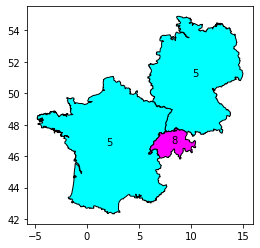

In [11]:
demand_map = country_map.merge(
    output_df_dict["Demand"],
    left_index = True,
    right_index = True
)
demand_map.plot(
    column = "Aug-21",
    cmap = cmap,
    edgecolor = edgecolor,
    linewidth = linewidth
)
for idx, row in demand_map.iterrows():
    plt.annotate(text = row["Aug-21"],
                 xy = row["labelpoint"],
                 horizontalalignment = "center"
                )

### Prices

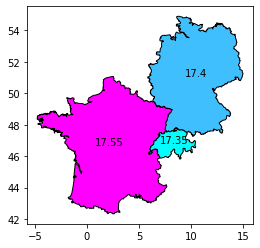

In [118]:
price_map = country_map.merge(
    output_df_dict["Price"],
    left_index = True,
    right_index = True
)
price_map.plot(
    column = "Aug-21",
    cmap = cmap,
    edgecolor = edgecolor,
    linewidth = linewidth
)
for idx, row in price_map.iterrows():
    plt.annotate(text = round(row["Aug-21"],2),
                 xy = row["labelpoint"],
                 horizontalalignment = "center"
                )

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
list(world[world["name"] == "France"].geometry.values[0])

/tmp/ipykernel_19929/652287095.py:2: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  list(world[world["name"] == "France"].geometry.values[0])
/tmp/ipykernel_19929/652287095.py:2: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  list(world[world["name"] == "France"].geometry.values[0])
